# Práctico de análisis y visualización

### Motivación:

La idea es empezar a explorar y analizar el conjunto de datos, responder a algunas preguntas que destaquen características del mismo junto con el uso de herramientas visuales.

### Consignas:


A continuación se proponen varias preguntas disparadoras que nos van a permitir tener un mayor conocimiento sobre el conjunto de datos para luego ser capaces de trasmitir esa información a cierto público, no necesariamente experto en el dominio. Cualquier nuevo análisis que no este contemplado es más que bienvenido, justamente en esta etapa se busca generar la mayor información posible a partir de los datos.


 1. Cantidad total de órdenes, usuarios y productos.


 2. Calcular estadísticos: media, mediana, moda, desviación estándar, valor mínimo, valor máximo de la cantidad de compras por usuario. Gráficar. A qué distribución conocida corresponde? Qué se puede concluir?
 
 
 3. Calcular media, mediana, desviación estándar, valor mínimo, valor máximo de los valores de compras. Determinar valores atípicos (outliers) y graficar. El porcentaje de valores atípicos es muy alto? Analizar por género, edad, ocupación de los consumidores.
 
 
 4. Top productos más vendidos, a qué categorias pertenecen? (tener en cuenta solo la columna $\textit{Product_Category_1}$). Estos productos son consumidos por usuarios de todas las edades o algunos rangos en particular? Graficar productos más vendidos por edad y por género.
 
 
 5. La categoría de productos menos vendidos corresponde a productos muy costosos? Cuáles categorías de productos son más consumidas por edad? y por género?
 
 
 6. Los usuarios que más compran (usuarios con más de 200 órdenes) poseen características en común? Cuáles?
 
 
 7. Analizar la distribución de ventas por edad, género y estado civil. Graficar.
 
 
 8. Qué categoría de ciudad posee el mayor porcentaje de compras dada la proporción de usuarios que contiene? Graficar.
 
 
 9. Analizar la correlación entre edad y ocupación de los consumidores. Hint: A pesar de que los datos se encuentran ofuscados hay dos ocupaciones que se pueden inferir gracias a esto ;)



### Evaluación:


- Elaborar un jupyter notebook que muestre el análisis realizado junto con la creación de las visualizaciones.


- Realizar un informe que muestre los resultados obtenidos y conclusiones. Esto puede ser un archivo en formato pdf, markdown, ppt, entre otros. Se valora la claridad de comunicación y la buena utilización de las herramientas de visualización.


- Fecha de entrega: a determinar, idealmente una semana para una primera entrega y en base al feedback recibido una segunda semana para ajustar detalles y realizar la entrega final.

In [1]:
import numpy
import pandas
import seaborn
import scipy
import matplotlib.pyplot as plt
from scipy import stats
import collections

In [2]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [3]:
ventas = pandas.read_csv(r'C:\Users\Usuario\Desktop\FACULTAD\Diplomatura FAMAF\Mentoria - Estimacion de ventas\Dataset\retail_sales.csv')

In [4]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


In [5]:
ventas.shape

(537577, 12)

In [6]:
ventas.sample(6)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
210625,1002478,P00115342,M,51-55,1,A,0,0,5,8.0,14.0,70.62
252793,1003024,P00193042,M,36-45,17,A,4+,0,5,6.0,16.0,52.11
405835,1002446,P00043642,M,18-25,7,B,0,0,5,NaN,NaN,69.52
489215,1003422,P00074442,M,26-35,5,B,2,0,1,16.0,NaN,41.37
130368,1002020,P00321742,M,26-35,7,B,0,1,5,8.0,17.0,37.01
479468,1001828,P00213742,M,18-25,4,B,1,0,8,NaN,NaN,80.93


# 1. Cantidad total de órdenes, usuarios y productos.

In [7]:
usuarios = ventas.drop_duplicates('User_ID')
productos = ventas.drop_duplicates('Product_ID')

c_ord = ventas['User_ID'].count()
c_usu = usuarios['User_ID'].count()
c_pro = productos['Product_ID'].count()

print("La cantidad total de órdenes es ",c_ord)
print("La cantidad total de usuarios es",c_usu)
print("La cantidad total de productos es",c_pro)

La cantidad total de órdenes es  537577
La cantidad total de usuarios es 5891
La cantidad total de productos es 3623


# 2. Calcular estadísticos: media, mediana, moda, desviación estándar, valor mínimo, valor máximo de la cantidad de compras por usuario. Gráficar. A qué distribución conocida corresponde? Qué se puede concluir?

In [8]:
## Obtenemos la cantidad de compras por cada usuario
compras = ventas.groupby('User_ID').count()[['Product_ID']]

print (compras)

         Product_ID
User_ID            
1000001          34
1000002          76
1000003          29
1000004          13
1000005         106
1000006          46
1000007          16
1000008          76
1000009          57
1000010         222
1000011          69
1000012          11
1000013          60
1000014          13
1000015         116
1000016          21
1000017         114
1000018         179
1000019         144
1000020          12
1000021          13
1000022         155
1000023         171
1000024          76
1000025          43
1000026         226
1000027          41
1000028          57
1000029          52
1000030          30
...             ...
1006011          99
1006012          15
1006013          72
1006014          54
1006015          32
1006016         469
1006017          15
1006018          76
1006019          44
1006020          23
1006021          64
1006022          24
1006023          77
1006024          55
1006025         142
1006026          42
1006027          22


In [9]:

## Creamos una tabla con las estadisticas de las compras por usuario
estadisticas = pandas.DataFrame(columns= ["Estadisticas","Cant. de veces que se repite"],index=["Media","Mediana","Moda","Desv.Est","Min","Max"])
estadisticas["Estadisticas"]["Media"] = numpy.mean(compras["Product_ID"]) 
estadisticas["Estadisticas"]["Mediana"] = numpy.median(compras["Product_ID"]) 
estadisticas["Estadisticas"]["Moda"] = scipy.stats.mode(compras["Product_ID"],nan_policy="omit")[0][0]
estadisticas["Cant. de veces que se repite"]["Moda"] = scipy.stats.mode(compras["Product_ID"],nan_policy="omit")[1][0]
estadisticas["Estadisticas"]["Desv.Est"] = numpy.std(compras["Product_ID"])
estadisticas["Estadisticas"]["Min"] = numpy.min(compras["Product_ID"])
estadisticas["Estadisticas"]["Max"] = numpy.max(compras["Product_ID"])
#estadisticas["Observaciones"]["Moda"] = scipy.stats.mode(compras["Product_ID"],nan_policy="omit")[1][0])

pandas.DataFrame(estadisticas)

#print (estadisticas) 
#print( "\n")




,Estadisticas,Cant. de veces que se repite
Media,91.2539,NaN
Mediana,53,NaN
Moda,17,122
Desv.Est,105.921,NaN
Min,5,NaN
Max,1025,NaN


In [10]:
print("La moda se repite ",scipy.stats.mode(compras["Product_ID"],nan_policy="omit")[1][0]," veces")

La moda se repite  122  veces


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


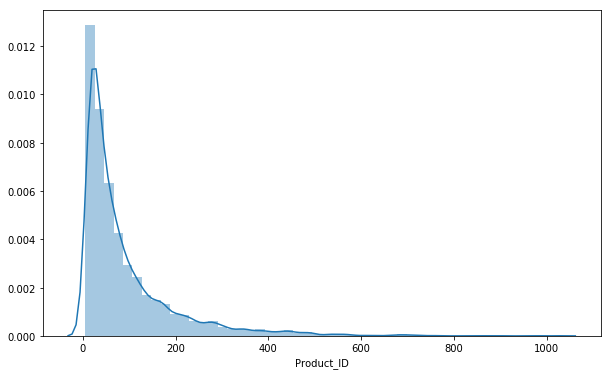

In [11]:
## Graficamos un histograma para analizar el tipo de distribución

plt.figure(figsize=(10,6))
seaborn.distplot(compras['Product_ID'])

In [12]:
## Analizamos la cantidad de personas que han comprado más de 600 veces
compras[compras['Product_ID'] > 600].shape[0]

27

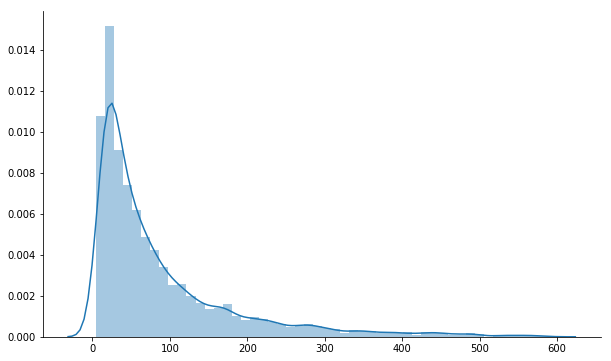

In [13]:
## Nos quedamos con las personas que hayan comprado menos de 600 veces (eliminamos los outliers)
compras_out = compras[compras['Product_ID'] < 600]

plt.figure(figsize=(10,6))
seaborn.distplot(compras_out, bins = 50)
seaborn.despine()

Es posible obsevar que los gráficos no están distribuidos normalmente.
Se observa una asimetría derecha en la distribución. Esto se debe a que la mayor parte de las personas no ha realizado tantas compras. Por ejemplo, 122 personas compraron 17 veces, lo cual se puede observar en el histograma.

# 2.1. Análisis de la cantidad de compras de acuerdo al sexo, edad, ocupación y si está soltero o casado

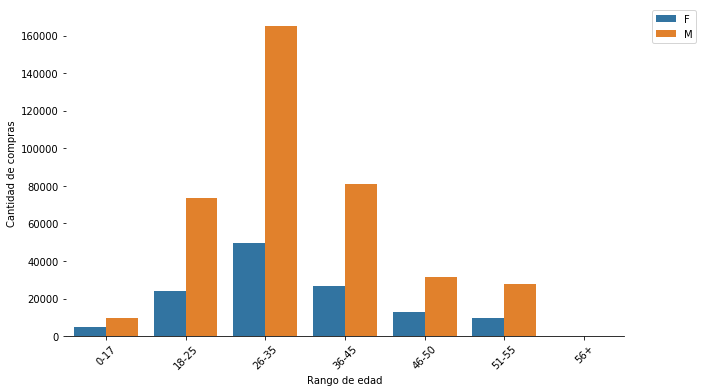

In [14]:
## Countplot separando por sexo y por edad

plt.figure(figsize=(10,6))

seaborn.countplot(data=ventas, x=ventas["Age"],
                hue='Gender',
                 order=['0-17','18-25','26-35','36-45','46-50','51-55','56+'])
plt.ylabel('Cantidad de compras')
plt.xlabel('Rango de edad')
#plt.ylim(0, 4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

En este gráfico se puede observar lo siguiente:

1)Los hombres realizaron más compras que las mujeres, para todos los rangos de edad.
2)La mayor cantidad de compras fueron realizadas por las personas de entre 26 y 35 años.
  

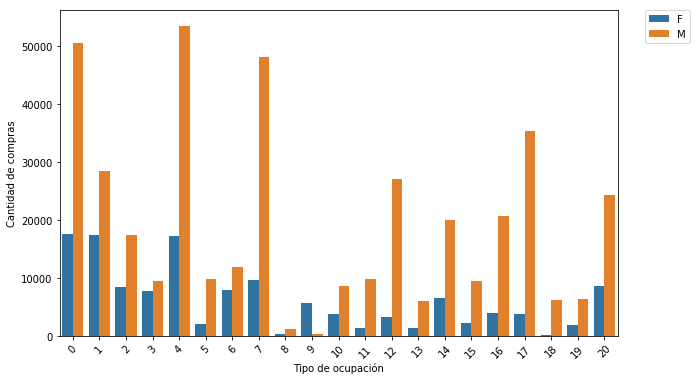

In [15]:
## Countplot separando por sexo y por ocupación

plt.figure(figsize=(10,6))

seaborn.countplot(data=ventas, x=ventas["Occupation"],
                hue='Gender')
plt.ylabel('Cantidad de compras')
plt.xlabel('Tipo de ocupación')
#plt.ylim(0, 4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#seaborn.despine(left=True)

En este gráfico se puede observar lo siguiente:

1)Las personas que más han comprado son aquellas que tienen los tipos de ocupaciones "4, 0 y 7"
2)Para cada tipo de ocupación se observa que los hombres compraron más que las mujeres, EXCEPTO para la ocupación "9", en donde las mujeres compraron más que los hombres.

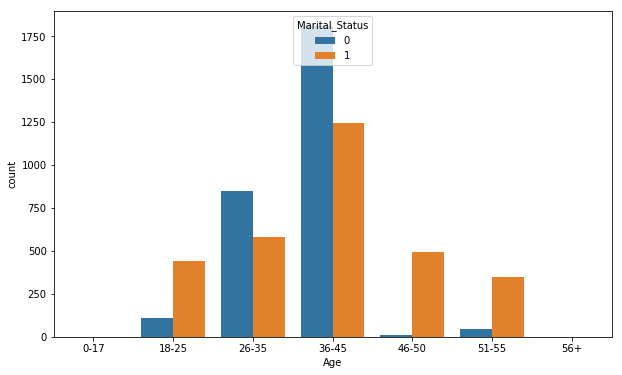

In [16]:
## Analizamos el tipo de ocupación "9", en donde las mujeres compraron más que los hombres (excepción a lo normal)

ocupacion_9 = ventas[ventas["Occupation"] == 9]

plt.figure(figsize=(10,6))
seaborn.countplot(data=ocupacion_9, x='Age',
                 hue = 'Marital_Status',
                 order=['0-17','18-25','26-35','36-45','46-50','51-55','56+'])




0 es soltero (azul)
1 es casado (naranja)

Para el tipo de ocupación "9", en donde las mujeres compraron más que los hombres, podemos decir lo siguiente:
1)Los que más compraron fueron las mujeres de entre 36 y 45 años, a diferencia de cuando se analizan todas las ocupaciones, en donde el rango de edad que más compras realizo es entre 26 y 35 años.
2)El hecho de estar soltero o casado no parece afectar la cantidad de compras, o no sigue un patrón definido.


# 3. Calcular media, mediana, desviación estándar, valor mínimo, valor máximo de los valores de compras. Determinar valores atípicos (outliers) y graficar. El porcentaje de valores atípicos es muy alto? Analizar por género, edad, ocupación de los consumidores

In [17]:
## Creamos una tabla con las estadisticas sobre los valores de compras para todas las personas

datos = pandas.DataFrame(columns= ["Datos de los precios"],index=["Media","Mediana","Desv.Est","Min","Max"])
datos["Datos de los precios"]["Media"] = numpy.mean(ventas["Purchase"]) 
datos["Datos de los precios"]["Mediana"] = numpy.median(ventas["Purchase"]) 
datos["Datos de los precios"]["Desv.Est"] = numpy.std(ventas["Purchase"])
datos["Datos de los precios"]["Min"] = numpy.min(ventas["Purchase"])
datos["Datos de los precios"]["Max"] = numpy.max(ventas["Purchase"])

pandas.DataFrame(datos)



,Datos de los precios
Media,93.3386
Mediana,80.62
Desv.Est,49.8102
Min,1.85
Max,239.61


In [18]:
## Vamos a analizar las estadisticas de los precios pagados según el género de la persona

pandas.DataFrame(ventas.groupby('Gender').describe()[['Purchase']])

Purchase                                                          
           count       mean        std   min    25%    50%     75%     max
Gender                                                                    
F       132197.0  88.097613  47.214401  1.85  54.59  79.29  114.36  239.59
M       405380.0  95.047717  50.510573  1.85  59.01  81.12  125.42  239.61

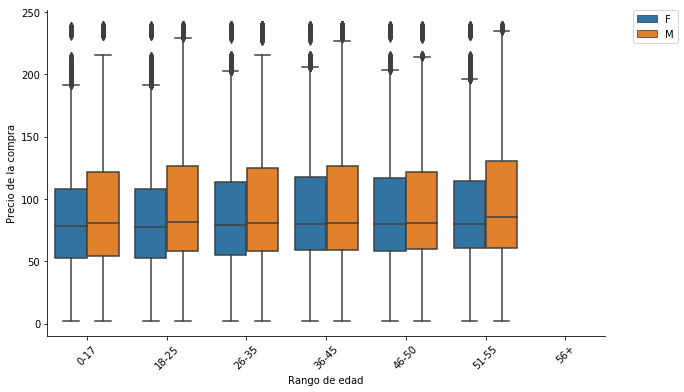

In [19]:
## Analizamos los precios pagados según el rango de edad y el género.

plt.figure(figsize=(10,6))
seaborn.boxplot(data=ventas,
                x = ventas["Age"],
                y=ventas["Purchase"],
                hue = ventas["Gender"],
               order=['0-17','18-25','26-35','36-45','46-50','51-55','56+'])
plt.xlabel('Rango de edad')
plt.ylabel('Precio de la compra')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

En el siguiente gráfico podemos observar lo siguiente:

1)En general los hombres compran cosas de mayor valor que las mujeres. Esto es posible observar por el tamaño de la caja.
2)Las mujeres pagan una mayor cantidad de veces precios atípicos (altos) que los hombres. Quizá que esto se deba a que sólo algunas mujeres realizan compras de gran valor a través de internet.

In [20]:
## Vamos a analizar las estadisticas de los precios pagados según la edad de la persona

pandas.DataFrame(ventas.groupby('Age').describe()[['Purchase']])

Purchase                                                            
          count       mean        std   min    25%    50%       75%     max
Age                                                                        
0-17    14707.0  90.201269  50.604989  1.87  53.65  80.09  119.0450  239.55
18-25   97634.0  92.351976  49.957234  1.85  54.39  80.41  120.4400  239.58
26-35  214690.0  93.145890  49.740814  1.85  58.33  80.43  120.6300  239.61
36-45  107499.0  94.014788  49.782521  1.85  59.10  80.76  121.3100  239.60
46-50   44526.0  92.848723  49.212536  1.86  59.21  80.50  120.2175  239.60
51-55   37618.0  96.206166  50.353265  1.87  60.56  81.72  125.7850  239.60
55+     20903.0  94.538986  49.391245  1.87  60.68  81.27  119.7600  239.60

In [21]:
## Vamos a analizar las estadisticas de los precios pagados según la ocupación de la persona

pandas.DataFrame(ventas.groupby('Occupation').describe()[['Purchase']])

Purchase                                                         \
              count       mean        std   min      25%     50%       75%   
Occupation                                                                   
0           68120.0  91.869467  49.352749  1.88  54.7000  80.160  119.7900   
1           45971.0  90.177031  47.913294  1.85  58.5900  79.770  117.2500   
2           25845.0  90.259390  49.106588  1.97  54.4100  79.640  117.5300   
3           17366.0  92.380773  49.633098  1.88  58.3400  80.210  119.7775   
4           70862.0  92.790267  50.036969  1.85  54.6300  80.580  120.5200   
5           11985.0  93.888490  49.876674  2.09  54.7600  80.920  121.1100   
6           19822.0  93.363786  49.478513  1.88  59.2325  80.675  120.0275   
7           57806.0  95.021753  50.442302  1.87  59.1400  80.850  126.0875   
8            1524.0  95.765085  48.846318  1.93  59.9575  85.405  126.4200   
9            6153.0  87.143359  46.001949  2.09  54.2700  79.020  114.6200   
10          12623.0  90.528364  50.735368  1.87  53.6400  80.490  119.7450   
11          11338.0  92.994672  50.557929  1.85  58.8900  80.620  120.3375   
12          30423.0  98.830525  50.835330  1.87  60.9800  85.960  132.7600   
13           7548.0  94.244494  48.688158  1.93  60.8475  81.110  118.5700   
14          26712.0  95.685364  50.219508  1.97  59.5500  81.370  125.7550   
15          11812.0  98.662399  50.399092  2.00  61.5075  85.840  132.1300   
16          24790.0  94.571331  49.518256  1.99  59.4600  80.790  122.9800   
17          39090.0  99.063790  50.836333  1.86  60.5500  86.620  133.5850   
18           6525.0  92.336714  49.372633  2.06  54.4100  79.660  120.7700   
19           8352.0  87.542492  49.995202  1.85  53.1075  78.510  117.5725   
20          32910.0  88.810995  48.906447  1.86  54.0500  79.155  116.9600   

                    
               max  
Occupation          
0           239.61  
1           239.60  
2           239.55  
3           239.14  
4           239.61  
5           239.24  
6           239.51  
7           239.48  
8           238.69  
9           239.43  
10          239.55  
11          239.46  
12          239.60  
13          239.59  
14          239.41  
15          239.49  
16          239.47  
17          239.61  
18          238.94  
19          239.39  
20          239.60

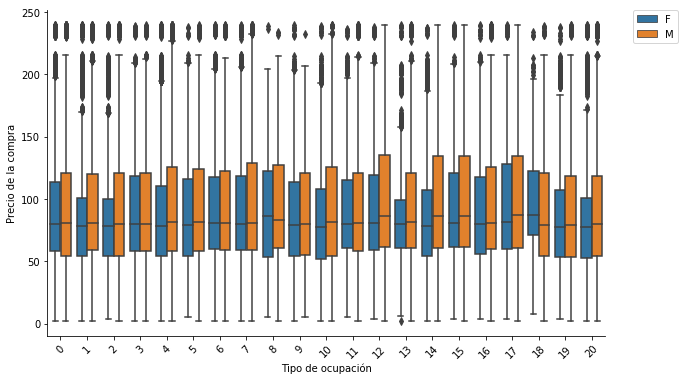

In [22]:
## Analizamos los precios pagados según la ocupación y el género.

plt.figure(figsize=(10,6))
seaborn.boxplot(data=ventas,
                x = ventas["Occupation"],
                y=ventas["Purchase"],
                hue = ventas["Gender"])
plt.xlabel('Tipo de ocupación')
plt.ylabel('Precio de la compra')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

AHORA VAMOS A DETECTAR LOS OUTLIERS 

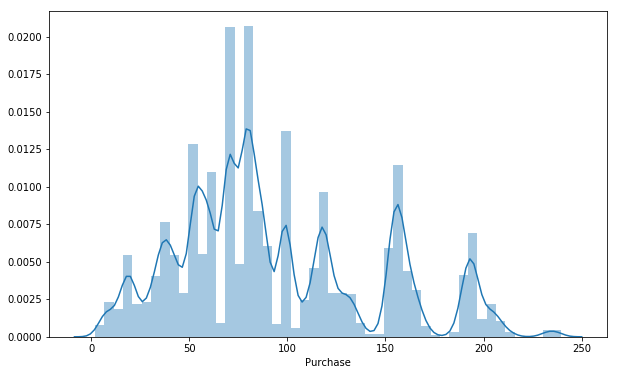

In [23]:
## Graficamos la distribución de los precios de cada transacción para ver como se distribuyen

plt.figure(figsize=(10,6))
seaborn.distplot(ventas['Purchase'])


In [24]:
## Determinamos los outliers

precios = ventas["Purchase"]

# Eliminar filas a más de 2.5 desviaciones estándares de la media
bien = numpy.abs(precios-precios.mean()) <= (2.5*precios.std())
data = precios[bien]
cant_outliers = precios.count() - data.count()
print("Cantidad de transacciones", ventas.Purchase.count())
print("Filas removidas", cant_outliers)
print("Precio máximo considerado", data.max())
porcentaje = round(cant_outliers/ventas.Purchase.count()*100,2)
print("El porcentaje de valores atipicos es del ",porcentaje ,"%")


if porcentaje > 5:
    print("El porcentaje de outliers SÍ es significativo")
else:
    print("El porcentaje de outliers NO es significativo")





Cantidad de transacciones 537577
Filas removidas 2316
Precio máximo considerado 215.69
El porcentaje de valores atipicos es del  0.43 %
El porcentaje de outliers NO es significativo


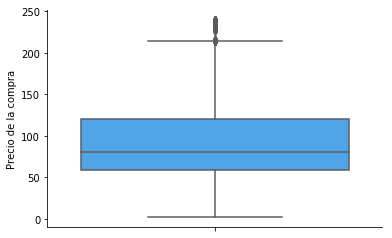

In [25]:
## Graficamos los outliers para toda la muestra

#plt.figure(figsize=(10,6))
seaborn.boxplot(data=ventas,
                 y=ventas["Purchase"],
                color=BLUE)
plt.ylabel('Precio de la compra')
plt.xticks(rotation=45)
seaborn.despine()

AHORA ANALIZAREMOS LOS OUTLIERS, DE ACUERDO AL TIPO DE OCUPACIÓN, EDAD Y SEXO.

In [26]:
## Creo un nuevo DataFrame con todas las columnas, donde los valores de los precios son OUTLIERS. 

outliers_data = ventas[numpy.abs(precios-precios.mean()) >= (2.5*precios.std())]

outliers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2316 entries, 343 to 537208
Data columns (total 12 columns):
User_ID                       2316 non-null int64
Product_ID                    2316 non-null object
Gender                        2316 non-null object
Age                           2316 non-null object
Occupation                    2316 non-null int64
City_Category                 2316 non-null object
Stay_In_Current_City_Years    2316 non-null object
Marital_Status                2316 non-null int64
Product_Category_1            2316 non-null int64
Product_Category_2            2081 non-null float64
Product_Category_3            622 non-null float64
Purchase                      2316 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 235.2+ KB


In [27]:
pandas.DataFrame(outliers_data['Occupation'].value_counts())

,Occupation
0,286
4,232
7,225
1,222
20,178
12,157
17,156
2,136
14,120
16,101


Esto significa que la ocupación tipo "0" es la que ha llegado a pagar precios más altos la mayoría de las veces.

In [28]:
pandas.DataFrame(outliers_data['Gender'].value_counts())

,Gender
M,1788
F,528


Significa que los hombres realizan una mayor cantidad compras más caras que las mujeres.

In [29]:
pandas.DataFrame(outliers_data['Age'].value_counts())

,Age
26-35,805
36-45,538
51-55,274
18-25,257
46-50,221
55+,167
0-17,54


Significa que las personas de entre 26 y 35 años son los que han pagado precios más altos la mayoría de las veces.

# 4. Top productos más vendidos, a qué categorias pertenecen? (tener en cuenta solo la columna  Product_Category_1 ). Estos productos son consumidos por usuarios de todas las edades o algunos rangos en particular? Graficar productos más vendidos por edad y por género.

In [30]:
## Buscamos el top 5 de los productos más vendisos. Para que el groupby me de una tabla bonita, le tengo que poner reset_index()

top_productos = ventas.groupby('Product_ID').size().reset_index()
top_productos.rename(columns={0:'Cantidad vendida'}, inplace=True)
top_productos


,Product_ID,Cantidad vendida
0,P00000142,1130
1,P00000242,371
2,P00000342,238
3,P00000442,92
4,P00000542,146
5,P00000642,512
6,P00000742,238
7,P00000842,36
8,P00000942,54
9,P00001042,494


In [31]:
top_5 = top_productos.sort_values('Cantidad vendida', ascending=False)
top_5

,Product_ID,Cantidad vendida
2534,P00265242,1858
1014,P00110742,1591
249,P00025442,1586
1028,P00112142,1539
565,P00057642,1430
1743,P00184942,1424
458,P00046742,1417
568,P00058042,1396
1353,P00145042,1384
581,P00059442,1384


In [32]:
top_5[:5]

,Product_ID,Cantidad vendida
2534,P00265242,1858
1014,P00110742,1591
249,P00025442,1586
1028,P00112142,1539
565,P00057642,1430


In [33]:
#top_5_datos = ventas[ventas['Product_ID'] == top_5['Product_ID']]
prod_1 = ventas[ventas['Product_ID'] == 'P00265242']
prod_2 = ventas[ventas['Product_ID'] == 'P00110742']
prod_3 = ventas[ventas['Product_ID'] == 'P00025442']
prod_4 = ventas[ventas['Product_ID'] == 'P00112142']
prod_5 = ventas[ventas['Product_ID'] == 'P00057642']
frames = [prod_1, prod_2, prod_3, prod_4, prod_5]
top_5_datos = pandas.concat(frames)
top_5_datos


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,NaN,86.52
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8.0,NaN,87.67
1372,1000222,P00265242,M,26-35,1,A,1,0,5,8.0,NaN,69.44
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8.0,NaN,86.28
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8.0,NaN,85.93
2404,1000383,P00265242,F,26-35,7,A,4+,1,5,8.0,NaN,69.98
2466,1000398,P00265242,M,26-35,17,B,3,1,5,8.0,NaN,86.46
2682,1000426,P00265242,M,18-25,4,A,1,1,5,8.0,NaN,88.90
2851,1000459,P00265242,F,18-25,4,A,3,0,5,8.0,NaN,87.70
3148,1000518,P00265242,F,36-45,12,C,4+,0,5,8.0,NaN,88.96


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

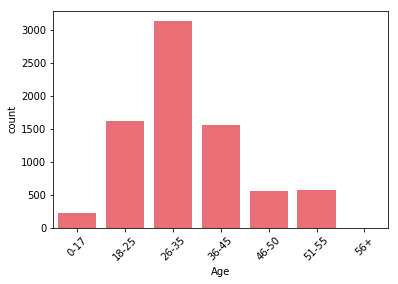

In [34]:
## Analizamos quiénes son las personas que consumen más los productos 'top 5' de acuerdo a la edad

seaborn.countplot(top_5_datos.Age, color=RED,
                 order=['0-17','18-25','26-35','36-45','46-50','51-55','56+'])
plt.xticks(rotation=45)

Concluimos que las personas que más consumen estos productos son las de entre 26 y 35 años por lejos.
Mientras que las personas menores de 17 años casi no compran estos productos, probablemente debido a que no realicen muchas compras en general.

In [35]:
## Analizamos para cada rango de edad, qué % representa la compra de los productos 'top 5' respecto a la compra total 
## de productos de ese mismo rango etario

Edad_1 = round(top_5_datos[top_5_datos['Age'] == '0-17'].count()['User_ID'] / ventas[ventas['Age']  == '0-17'].count()['User_ID'] * 100, 2)
Edad_2 = round(top_5_datos[top_5_datos['Age'] == '18-25'].count()['User_ID'] / ventas[ventas['Age']  == '18-25'].count()['User_ID'] * 100, 2)
Edad_3 = round(top_5_datos[top_5_datos['Age'] == '26-35'].count()['User_ID'] / ventas[ventas['Age']  == '26-35'].count()['User_ID'] * 100, 2)
Edad_4 = round(top_5_datos[top_5_datos['Age'] == '36-45'].count()['User_ID'] / ventas[ventas['Age']  == '36-45'].count()['User_ID'] * 100, 2)
Edad_5 = round(top_5_datos[top_5_datos['Age'] == '46-50'].count()['User_ID'] / ventas[ventas['Age']  == '46-50'].count()['User_ID'] * 100, 2)
Edad_6 = round(top_5_datos[top_5_datos['Age'] == '51-55'].count()['User_ID'] / ventas[ventas['Age']  == '51-55'].count()['User_ID'] * 100, 2)
Edad_7 = round(top_5_datos[top_5_datos['Age'] == '56+'].count()['User_ID'] / ventas[ventas['Age']  == '56+'].count()['User_ID'] * 100, 2)

edades = [Edad_1, Edad_2,Edad_3,Edad_4,Edad_5,Edad_6,Edad_7]

pandas.DataFrame(edades)


C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  # Remove the CWD from sys.path while we load stuff.


,0
0,1.56
1,1.66
2,1.46
3,1.46
4,1.28
5,1.52
6,NaN


La conclusión a la que llegamos es que en general el % de compras de los productos 'top 5' respecto al total de compras es muy similar para todos los grupos etarios (en ningún caso supera el 2%). 
El que tiene un % mayor es el grupo de entre 18 y 25 años, pudiendo decir que las compras en ese grupo están un poco más concentradas en esos productos que el resto de los rangos etarios (pero por muy poco).

(array([0, 1]), <a list of 2 Text xticklabel objects>)

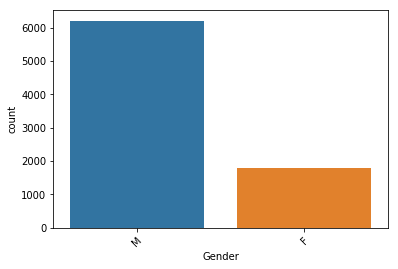

In [36]:
## Analizamos quiénes son las personas que consumen más los productos 'top 5' de acuerdo al sexo

seaborn.countplot(top_5_datos.Gender)
plt.xticks(rotation=45)

Concluimos que los hombres son los que más compran los productos 'top 5'. Compran el triple aproximadamente que las mujeres esos productos

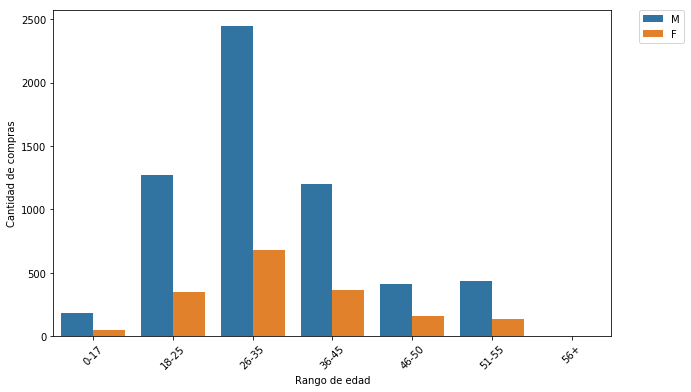

In [37]:
## ## Analizamos quiénes son las personas que consumen más los productos 'top 5' de acuerdo al sexo y la edad

plt.figure(figsize=(10,6))
seaborn.countplot(data=top_5_datos, x= top_5_datos["Age"],
                  hue = 'Gender',
                order=['0-17','18-25','26-35','36-45','46-50','51-55','56+'])
plt.ylabel('Cantidad de compras')
plt.xlabel('Rango de edad')
#plt.ylim(0, 4)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Para todos los rangos de edad los hombres compran más los productos 'top 5' que las mujeres.

# 5. La categoría de productos menos vendidos corresponde a productos muy costosos? Cuáles categorías de productos son más consumidas por edad? y por género?

In [38]:
## Vamos a quedarnos con las categorías de productos menos vendidos. Para ello utilizaremos algún criterio

#menos_vend = top_5.iloc[0:2,]  ->  esto lo uso para quedarme con las filas que yo quiera
#menos_vend


print('La cantidad de tipos de productos es de ', top_5['Cantidad vendida'].count())
print('La cantidad de tipos de productos con solamente 1 compra es de ',top_5[top_5['Cantidad vendida'] < 2].count()['Cantidad vendida'])

La cantidad de tipos de productos es de  3623
La cantidad de tipos de productos con solamente 1 compra es de  141


In [39]:
## Nos quedamos entonces con los productos que han sido vendidos una sóla vez, y trabajamos sobre estos

menos_vend = top_5[top_5['Cantidad vendida'] == 1]
menos_vend

,Product_ID,Cantidad vendida
986,P00107942,1
3013,P00314742,1
215,P00022042,1
523,P00053242,1
554,P00056342,1
2136,P00224642,1
1469,P00156642,1
779,P00080442,1
3265,P00340742,1
1400,P00149742,1


In [40]:
menos_vend = pandas.merge(menos_vend, ventas, how='left', on='Product_ID')
menos_vend

,Product_ID,Cantidad vendida,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00107942,1,1000293,M,55+,1,C,1,1,8,16.0,NaN,21.61
1,P00314742,1,1003610,M,18-25,6,B,4+,0,14,NaN,NaN,41.94
2,P00022042,1,1004101,M,18-25,4,C,3,0,16,NaN,NaN,87.34
3,P00053242,1,1000670,M,26-35,12,B,3,1,8,NaN,NaN,39.37
4,P00056342,1,1000587,M,26-35,20,B,3,0,5,NaN,NaN,51.75
5,P00224642,1,1005328,F,26-35,4,B,3,1,8,16.0,NaN,78.20
6,P00156642,1,1004553,F,36-45,16,C,2,0,16,NaN,NaN,82.05
7,P00080442,1,1001470,M,18-25,4,A,1,1,7,NaN,NaN,81.24
8,P00340742,1,1000700,M,51-55,17,C,1,1,8,NaN,NaN,79.89
9,P00149742,1,1001470,M,18-25,4,A,1,1,5,8.0,NaN,35.93


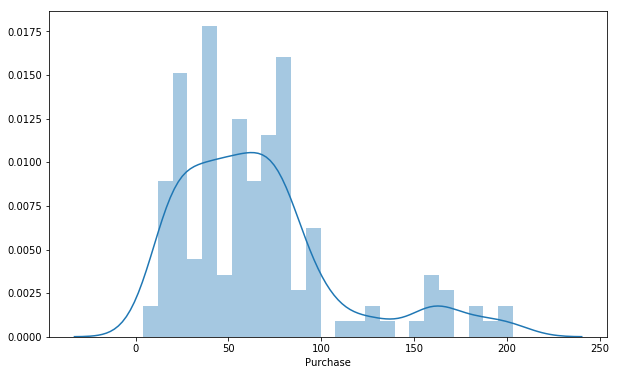

In [41]:
## Analizamos la distribución de los precios de los productos menos vendidos

plt.figure(figsize=(10,6))
seaborn.distplot(menos_vend['Purchase'], bins = 25)


In [42]:
## Creamos una tabla con las estadisticas sobre los precios de los productos menos vendidos

datos = pandas.DataFrame(columns= ["Datos de los precios"],index=["Media","Mediana","Desv.Est","Min","Max", 'Cant.vendida con P>$100'])
datos["Datos de los precios"]["Media"] = numpy.mean(menos_vend["Purchase"]) 
datos["Datos de los precios"]["Mediana"] = numpy.median(menos_vend["Purchase"]) 
datos["Datos de los precios"]["Desv.Est"] = numpy.std(menos_vend["Purchase"])
datos["Datos de los precios"]["Min"] = numpy.min(menos_vend["Purchase"])
datos["Datos de los precios"]["Max"] = numpy.max(menos_vend["Purchase"])
datos["Datos de los precios"]["Cant.vendida con P>$100"] = menos_vend[menos_vend['Purchase'] > 100].count()['Product_ID']

pandas.DataFrame(datos)

,Datos de los precios
Media,65.9918
Mediana,59.37
Desv.Est,43.7226
Min,4.05
Max,203.23
Cant.vendida con P>$100,18


Al analizar la distribución de precios de los productos que han sido vendidos una sola vez, podemos ver que:
1)Los precios de estos productos no se distribuyen normalmente, y la dispersión de los mismos va entre $4 y $204 aproximadamente. Es decir, los precios de estos productos son muy variados.
1)En general los precios de estos productos son menores a $100. Sin embargo, algunos de estos productos han sido vendidos a un precio mayor a $100. Más precisamente, 18 productos fueron vendidos a un precio mayor a $100 (casi un 13% de los productos menos vendidos).

Podemos concluir que las bajas ventas de estos productos (sólo fueron vendidos una sola vez) no se debe a que son muy costosos.
El problema es otro, pero no podemos saber cuál.

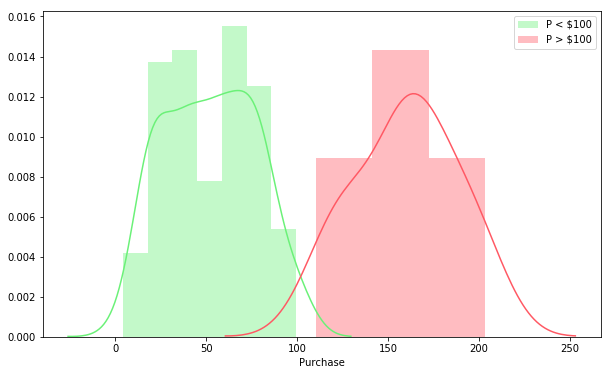

In [43]:
## Ahora vamos a dividir a los productos menos vendidos según si su precio es mayor o menor a $100 para ver su distribución

menor_100 = menos_vend[menos_vend['Purchase'] < 100]
mayor_100 = menos_vend[menos_vend['Purchase'] > 100]

plt.figure(figsize=(10,6))
seaborn.distplot(menor_100['Purchase'], color=GREEN, label='P < $100')
seaborn.distplot(mayor_100['Purchase'], color=RED, label='P > $100')
plt.legend()

In [44]:
datos = pandas.DataFrame(columns= ["P < 100", 'P > 100' ],index=["Media","Mediana","Desv.Est","Min","Max", 'Cant.vendida'])
datos["P < 100"]["Media"] = numpy.mean(menor_100["Purchase"]) 
datos["P < 100"]["Mediana"] = numpy.median(menor_100["Purchase"]) 
datos["P < 100"]["Desv.Est"] = numpy.std(menor_100["Purchase"])
datos["P < 100"]["Min"] = numpy.min(menor_100["Purchase"])
datos["P < 100"]["Max"] = numpy.max(menor_100["Purchase"])
datos["P < 100"]["Cant.vendida"] = menor_100.count()['Product_ID']

datos["P > 100"]["Media"] = numpy.mean(mayor_100["Purchase"]) 
datos["P > 100"]["Mediana"] = numpy.median(mayor_100["Purchase"]) 
datos["P > 100"]["Desv.Est"] = numpy.std(mayor_100["Purchase"])
datos["P > 100"]["Min"] = numpy.min(mayor_100["Purchase"])
datos["P > 100"]["Max"] = numpy.max(mayor_100["Purchase"])
datos["P > 100"]["Cant.vendida"] = mayor_100.count()['Product_ID']

pandas.DataFrame(datos)

,P < 100,P > 100
Media,52.2681,159.77
Mediana,53.05,159.66
Desv.Est,24.6756,27.0683
Min,4.05,110.12
Max,99.41,203.23
Cant.vendida,123,18


Al dividir la población en aquellos productos mayores y menores a $100, podemos observar que se elimina la asimetría debido a que ya no hay valores atípicos en las poblaciones. Sin embargo, el tamaño de la muestra es mucho menor para el caso de productos con precios mayores a $100

In [45]:
## Ahora analizaremos que tipo de productos es más vendido según el rango de edad

ranking = ventas.groupby(['Age','Product_ID']).size().reset_index()
ranking.rename(columns={0:'Cantidad vendida'}, inplace=True)
ranking

,Age,Product_ID,Cantidad vendida
0,0-17,P00000142,55
1,0-17,P00000242,19
2,0-17,P00000342,11
3,0-17,P00000442,2
4,0-17,P00000542,9
5,0-17,P00000642,10
6,0-17,P00000742,8
7,0-17,P00000842,4
8,0-17,P00000942,1
9,0-17,P00001042,26


In [46]:
ranking1 = ranking.groupby('Age').max()['Cantidad vendida'].reset_index()
#ranking1.rename(columns={'Cantidad vendida': 'C'}, inplace=True)
ranking1


,Age,Cantidad vendida
0,0-17,64
1,18-25,388
2,26-35,732
3,36-45,348
4,46-50,136
5,51-55,140
6,55+,104


In [47]:
ranking2 = pandas.merge(ranking1,ranking, how = 'left', on=['Age','Cantidad vendida'])
ranking2

,Age,Cantidad vendida,Product_ID
0,0-17,64,P00255842
1,18-25,388,P00265242
2,26-35,732,P00265242
3,36-45,348,P00025442
4,46-50,136,P00265242
5,51-55,140,P00265242
6,55+,104,P00265242


Estos son los productos más vendidos por cada rango de edad

In [48]:
## Vemos cuáles son los productos más vendidos según el género

ranking_G = ventas.groupby(['Gender','Product_ID']).size().reset_index()
ranking_G.rename(columns={0:'Cantidad vendida'}, inplace=True)

ranking_G1 = ranking_G.groupby('Gender').max()['Cantidad vendida'].reset_index()

ranking_G2 = pandas.merge(ranking_G1,ranking_G, how = 'left', on=['Gender','Cantidad vendida'])
ranking_G2

,Gender,Cantidad vendida,Product_ID
0,F,505,P00265242
1,M,1353,P00265242


# 6. Los usuarios que más compran (usuarios con más de 200 órdenes) poseen características en común? Cuáles?

In [49]:
## Sacamos la cantidad de compras por usuario

usuarios = ventas.groupby('User_ID').size().reset_index()
usuarios.rename(columns={0:'Cantidad de compras'}, inplace=True)
usuarios

,User_ID,Cantidad de compras
0,1000001,34
1,1000002,76
2,1000003,29
3,1000004,13
4,1000005,106
5,1000006,46
6,1000007,16
7,1000008,76
8,1000009,57
9,1000010,222


In [55]:
## Nos quedamos con los usuarios con más de 200 compras

usuarios_200 = usuarios[usuarios['Cantidad de compras'] > 200]
usuarios_200 = pandas.merge(usuarios_200, ventas, how = 'left', on = 'User_ID')
usuarios_200_1 = usuarios_200.drop_duplicates('User_ID')
usuarios_200_1


,User_ID,Cantidad de compras,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000010,222,P00085942,F,36-45,1,B,4+,1,2,4.0,8.0,163.52
222,1000026,226,P00043242,M,26-35,7,B,2,1,5,NaN,NaN,18.48
448,1000033,215,P00285442,M,46-50,3,A,1,1,8,NaN,NaN,78.54
663,1000048,337,P00055642,M,26-35,4,B,3,1,4,5.0,NaN,14.47
1000,1000053,377,P00117542,M,26-35,0,B,1,0,18,NaN,NaN,37.94
1377,1000058,260,P00110742,M,26-35,2,B,3,0,1,2.0,8.0,158.24
1637,1000062,281,P00013742,F,36-45,3,A,1,0,5,NaN,NaN,52.34
1918,1000092,223,P00317942,F,18-25,4,B,1,0,8,16.0,NaN,78.84
2141,1000117,282,P00351342,M,26-35,17,A,2,1,1,2.0,16.0,83.37
2423,1000123,352,P00248142,M,36-45,9,B,4+,1,5,NaN,NaN,36.39


VAMOS A ANALIZAR A LOS USUARIOS CON MÁS COMPRAS

In [68]:
# Ahora vamos a analizar -> ESTO MEDIO QUE ESTÁ AL PEDO, LO PUEDO ELIMINAR

ocupaciones = usuarios_200_1.groupby('Occupation')['Cantidad de compras'].agg({'Cantidad de compras totales' : sum},{''})
ocupaciones = ocupaciones.sort_values('Cantidad de compras totales', ascending=False)
ocupaciones

C:\Users\Usuario\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


,Cantidad de compras totales
Occupation,
0,32028
4,31755
7,24666
1,18938
20,17373
16,12900
17,12865
2,12833
14,12065


([<matplotlib.axis.YTick at 0x16a86919898>,
 <a list of 12 Text yticklabel objects>)

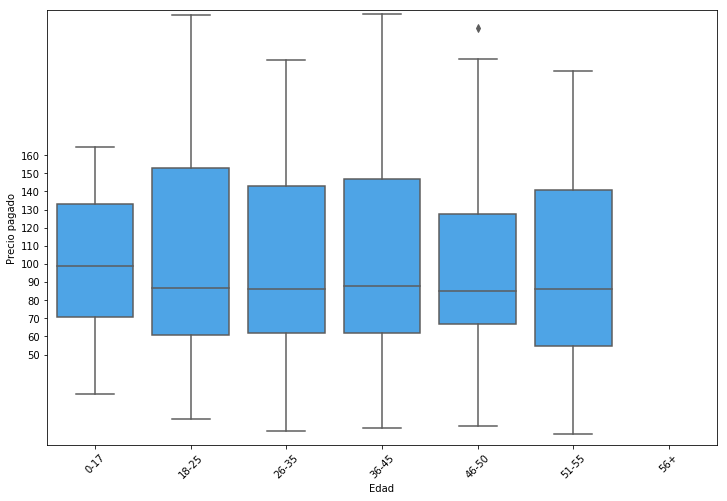

In [77]:
## Analizamos los precios que pagan las personas con más de 200 compras, según la edad que tengan.

plt.figure(figsize=(12,8))
seaborn.boxplot(data=usuarios_200_1,
                x='Age', y='Purchase',
                color=BLUE,
               order=['0-17','18-25','26-35','36-45','46-50','51-55','56+'])
plt.ylabel('Precio pagado')
plt.xlabel('Edad')
plt.xticks(rotation=45)
plt.ylim(0, 240)
plt.yticks([50,60,70,80,90,100,110,120,130,140,150,160])


Podemos observar las siguientes características de las personas con + de 200 compras:

1)Para todos los rangos de edad la mediana del precio pagado por las compras es cercano a $85. Sin embargo, no ocurre lo mismo para los jóvenes menores de 17 años, cuya mediana es cercana a $100
2)En general no hay valores atípicos de los precios pagados por estas personas en ningun rango.
3)La dispersión de los precios pagados es menor para los menores de 17 años, en comparación con el resto de los rangos de edad.
 Mientras que las personas de entre 18 y 25 años, y las personas de entre 36 y 45 años son los que tienen mayor variedad de precios pagados por sus compras


In [123]:
edad = usuarios_200_1.groupby('Age')['Cantidad de compras'].sum().reset_index()
edad = edad.sort_values('Cantidad de compras', ascending=False)
edad

,Age,Cantidad de compras
2,26-35,103919
3,36-45,45128
1,18-25,41816
4,46-50,18147
5,51-55,13376
6,55+,3829
0,0-17,3101


De entre las personas con más de 200 compras, aquellas entre 26 y 35 años fueron las que más compras realizaron. Compraron más que el doble que el segundo grupo que más compró (entre 36 y 45 años)

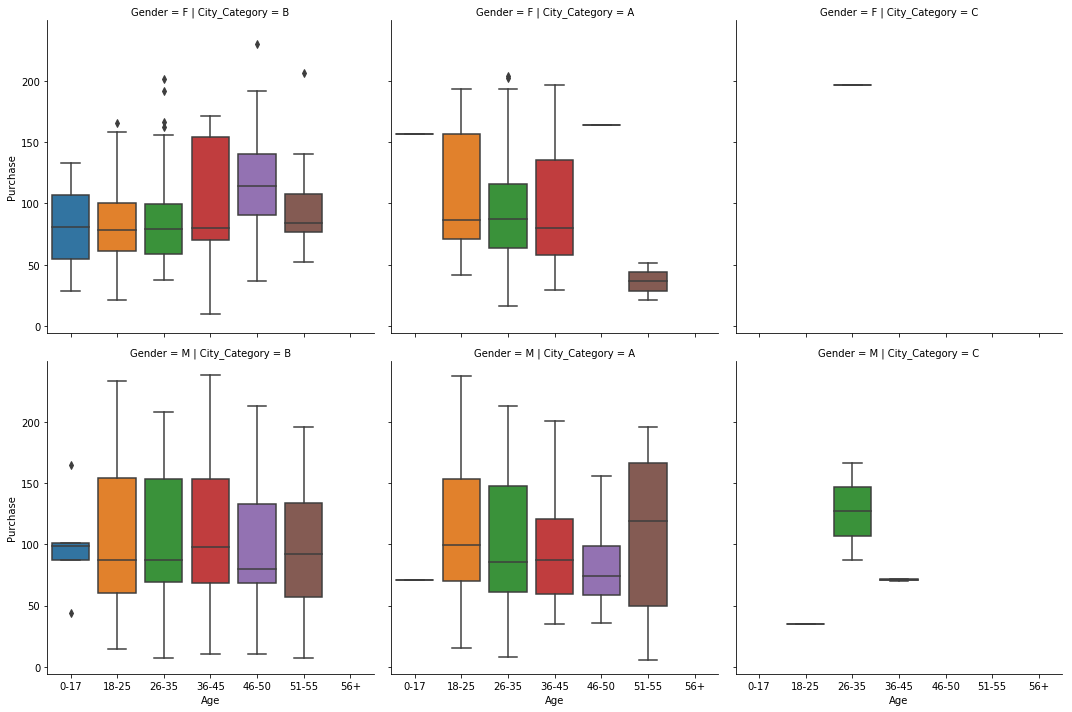

In [81]:
## Ahora analizamos los precios pagados por las personas, según su rango de edad, según su sexo, 
## y según al tipo de ciudad que pertenezcan

seaborn.catplot(data=usuarios_200_1, x='Age', y='Purchase', 
                order=['0-17','18-25','26-35','36-45','46-50','51-55','56+'],
    row='Gender', col='City_Category',
    kind='box')

En este gráfico se pueden obtener varias conclusiones acerca de los usuarios que más han comprado:

1)En las ciudades tipo "C" prácticamente los únicos que han realizado compras son los hombres de entre 26 y 35 años.
Son muy pocas las compras hechas por personas que viven en este tipo de ciudades.
2)Tanto los hombres como las mujeres de las ciudades tipo "A" menores a 17 años no han realizado compras prácticamente
3)Con respecto a las ciudades tipo "B", las mujeres de entre 46 y 50 años han pagado precios bastante más altos que los hombres  del mismo rango etario.
4)Si comparamos las ciudades tipo "A" y "B", en general la mayoría de las compras realizadas por los hombres se distribuyen entre los 18 y 55 años.
Sin embargo, si comparamos las compras realizadas por las mujeres de ambos tipos de ciudades, observamos que las compras fueron realizadas de manera equitativa por todos los rangos etarios (salvo entre 36 y 45 años que han realizado mayor cantidad de compras).

CARACTERÍSTICAS COMUNES DE LOS QUE MÁS COMPRAN

1)Las personas con más compras pertenecen a las ciudades tipo A y B (salvo los hombres de entre 26 y 35 años de las ciudades tipo C que también compran mucho)

In [82]:
ventas

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,79.69
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,152.27
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,192.15
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,158.54
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,156.86
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,78.71


In [113]:
## Vamos a ver qué productos son los que más compran estas personas

compras = usuarios_200_1.groupby('Product_ID')['Cantidad de compras'].sum().reset_index()
compras.sort_values('Cantidad de compras', ascending=False)
compras = compras[:5]

precios = usuarios_200_1.groupby('Product_ID')['Purchase'].mean().reset_index()


ciudad = usuarios_200_1.groupby('Product_ID')['City_Category'].max().reset_index()

merge = pandas.merge(compras, precios, how = 'left', on = 'Product_ID')

merge1 = pandas.merge(merge, ciudad, how = 'left', on = 'Product_ID')

merge1

#merge = pandas.merge(productos_top, ventas, how='left', on='Product_ID')
#usuarios_200_1.groupby('Occupation')['Cantidad de compras'].agg({'Cantidad de compras totales' : sum},{''})

,Product_ID,Cantidad de compras,Purchase,City_Category
0,P00000642,894,96.175,A
1,P00001042,574,119.260,A
2,P00001742,500,61.810,B
3,P00002542,290,78.350,B
4,P00003242,336,78.000,B


El producto que más compran las personas con + de 200 compras, es el producto P00000642. Esas personas pagan un precio promedio de $96.17, y la mayoría de las personas (con más de 200 compras) que compra ese producto viven en las ciudades tipo "A".

In [114]:
ventas

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,79.69
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,152.27
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,192.15
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,158.54
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,156.86
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,78.71


In [118]:
## Analizamos la cantidad de compras por ocupación de las personas con más de 200 compras

ocupacion = usuarios_200_1.groupby('Occupation')['Cantidad de compras'].sum().reset_index()
ocupacion = ocupacion.sort_values('Cantidad de compras', ascending=False)
ocupacion

,Occupation,Cantidad de compras
0,0,32028
4,4,31755
7,7,24666
1,1,18938
20,20,17373
16,16,12900
17,17,12865
2,2,12833
14,14,12065
6,6,9699


Las personas con la ocupación "0" son las que más compras han hecho, mientrasque las personas con 
ocupación "8" las que menos compras hicieron (dentro de las personas que hicieron más de 200 compras)

In [124]:
ventas

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,79.69
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,152.27
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,192.15
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,158.54
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,156.86
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,78.71


In [126]:
## Analizamos la cantidad de compras según los años que haya estado viviendo la persona en su ciudad

años = usuarios_200_1.groupby('Stay_In_Current_City_Years')['Cantidad de compras'].sum().reset_index()
años = años.sort_values('Cantidad de compras', ascending=False)
años

,Stay_In_Current_City_Years,Cantidad de compras
1,1,78548
3,3,43057
2,2,38981
4,4+,34601
0,0,34129


TypeError: text() missing 1 required positional argument: 's'

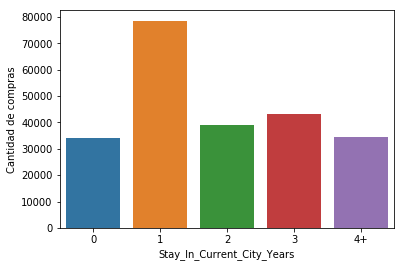

In [129]:
g = seaborn.barplot(data=años, x='Stay_In_Current_City_Years', y='Cantidad de compras',
               order = ['0', '1', '2', '3', '4+'])

## Le quiero agregar las etiquetas de datos a las columnas , pero no pude

for index, row in años.iterrows():
    g.text(row.name,row['Cantidad de compras'], color='black', ha="center")

Dentro de las personas que realizaron mas de 200 compras, aquellas que hayan vivido menos de 2 años y más de 1 año, son las que más compras hicieron. 

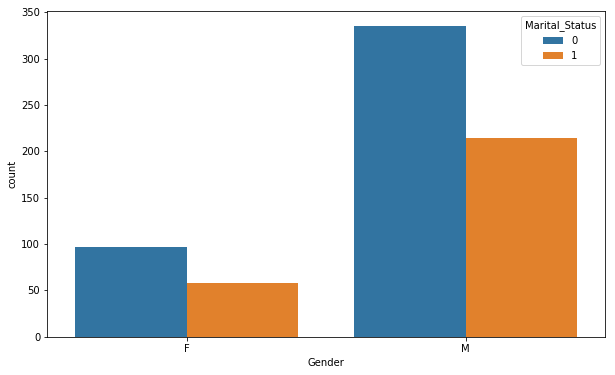

In [130]:
## Analizamos ahora, dentro de las personas con más de 200 compras, quiénes compraron más de acuerdo al
## sexo y a si están casados o no

plt.figure(figsize=(10,6))
seaborn.countplot(data=usuarios_200_1, x='Gender', hue = 'Marital_Status')

In [ ]:
Dentro de las personas con + de 200 compras, los que más compraron por lejos son los hombres.
Por otro lado, los que más compraron son los solteros, ya sean hombres o mujeres.

In [131]:
ventas

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,83.70
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,152.00
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,14.22
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,10.57
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,79.69
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,152.27
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,192.15
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,158.54
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,156.86
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,78.71


# 7. Analizar la distribución de ventas por edad, género y estado civil. Graficar.

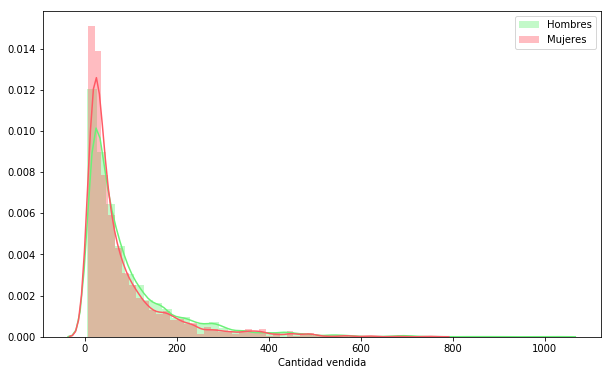

In [161]:
## Analizamos la distribución de ventas por género

cantidad = ventas.groupby('User_ID').size().reset_index()
cantidad.rename(columns={0:'Cantidad vendida'}, inplace=True)

merge = pandas.merge (cantidad,ventas, how = 'left', on = 'User_ID')
merge = merge.drop_duplicates('User_ID')

hombres = merge[merge['Gender'] == 'M']
mujeres = merge[merge['Gender'] == 'F']

plt.figure(figsize=(10,6))
seaborn.distplot(hombres['Cantidad vendida'], color=GREEN, label='Hombres')
seaborn.distplot(mujeres['Cantidad vendida'], color=RED, label='Mujeres')
plt.legend()



También podemos usar el gráfico QQ para comparar la distribución de salarios entre hombre y mujeres. Si la diferencia en los histogramas se debe sólo a que la muestra de mujeres es más pequeña, entonces las distribuciones subyacentes deberían ser iguales. Por otro lado, si las distribuciones son distintas es probable que existan otros factores aparte de la cantidad que llevan a que mujeres cobren menos dinero.

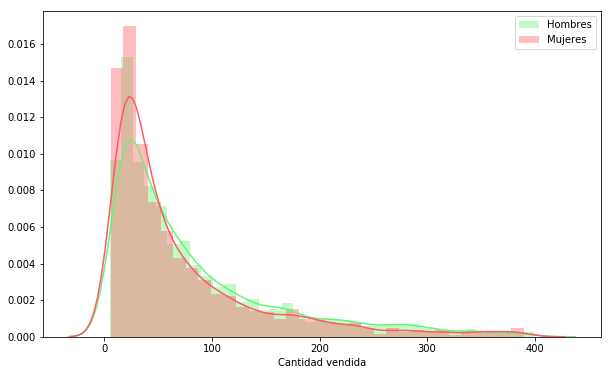

In [163]:
## Sacamos los outlier (personas con más de 400 compras) y volvemos a graficar

cantidad = ventas.groupby('User_ID').size().reset_index()
cantidad.rename(columns={0:'Cantidad vendida'}, inplace=True)
cantidad = cantidad[cantidad['Cantidad vendida'] < 400]

merge = pandas.merge (cantidad,ventas, how = 'left', on = 'User_ID')
merge = merge.drop_duplicates('User_ID')

hombres = merge[merge['Gender'] == 'M']
mujeres = merge[merge['Gender'] == 'F']

plt.figure(figsize=(10,6))
seaborn.distplot(hombres['Cantidad vendida'], color=GREEN, label='Hombres')
seaborn.distplot(mujeres['Cantidad vendida'], color=RED, label='Mujeres')
plt.legend()


Las distribuciones de las ventas son muy similares entre hombres y mujeres. Ambas distribuciones se concentran en valores menores a 50 (la mayoria de las personas hizo menos de 50 compras). La concentración es más grande para el caso de las mujeres.
Para ambas distribuciones se observa la asimetría derecha, dada por la poca cantidad de personas que han hecho muchas compras (a medida que aumenta la cantidad de compras por persona, disminuye la cantidad de personas que han hecho esas cantidades de compras).

In [ ]:
percentiles = numpy.linspace(0,100,21)  # Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.

per_hombres = numpy.percentile(hombres['Cantidad vendida'], percentiles)
per_mujeres = numpy.percentile(mujeres['Cantidad vendida'], percentiles)

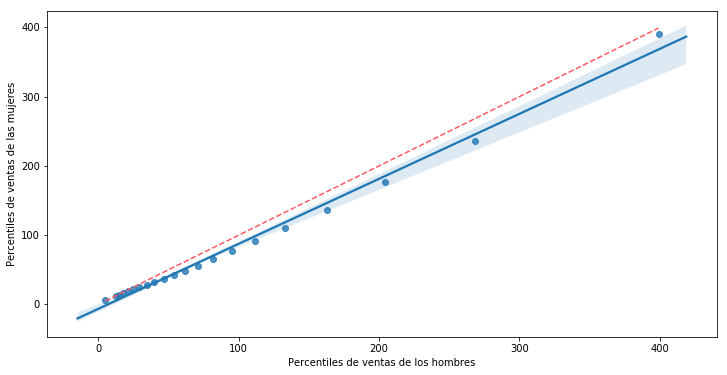

In [173]:
plt.figure(figsize=(12,6))
seaborn.regplot(x=per_hombres, y=per_mujeres)
plt.xlabel('Percentiles de ventas de los hombres')
plt.ylabel('Percentiles de ventas de las mujeres')

# Graficamos la linea de la identidad.
x = numpy.linspace(numpy.min((per_hombres.min(),per_mujeres.min())), numpy.max((per_hombres.max(),per_mujeres.max())))
plt.plot(x,x, color=RED, ls="--")

Si ambas distribuciones están relacionadas linearmente, entonces los puntos del gráfico QQ estarán alineados, aunque no necesariamente en la dirección de la identidad. Por lo tanto, concluimos que ambas distribuciones están relacionadas linealmente.
En este caso, si la tendencia del gráfico está por debajo de la identidad (es decir, tiene menor pendiente), la segunda distribución (la del eje x) es más dispersa que la primera. Es decir, la distribución de las ventas de los hombres es levemente más dispersa que la de las mujeres. Esta conclusión coincide con la de los histogramas de arriba

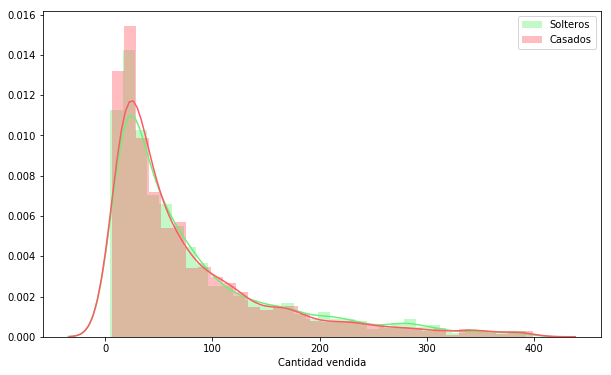

In [166]:
## Analizamos la distribución de ventas por estado civil

cantidad = ventas.groupby('User_ID').size().reset_index()
cantidad.rename(columns={0:'Cantidad vendida'}, inplace=True)
cantidad = cantidad[cantidad['Cantidad vendida'] < 400]

merge = pandas.merge (cantidad,ventas, how = 'left', on = 'User_ID')
merge = merge.drop_duplicates('User_ID')

solteros = merge[merge['Marital_Status'] == 0]
casados = merge[merge['Marital_Status'] == 1]

plt.figure(figsize=(10,6))
seaborn.distplot(solteros['Cantidad vendida'], color=GREEN, label='Solteros')
seaborn.distplot(casados['Cantidad vendida'], color=RED, label='Casados')
plt.legend()


Las distribuciones de ventas son MUY similares para los solteros y casados.

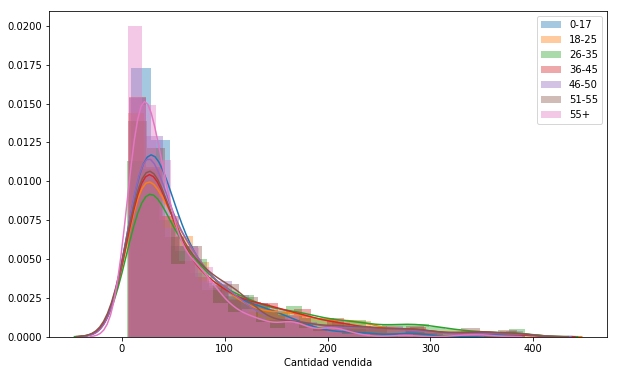

In [168]:
## Analizamos la distribución de ventas por el rango de edad

cantidad = ventas.groupby('User_ID').size().reset_index()
cantidad.rename(columns={0:'Cantidad vendida'}, inplace=True)
cantidad = cantidad[cantidad['Cantidad vendida'] < 400]

merge = pandas.merge (cantidad,ventas, how = 'left', on = 'User_ID')
merge = merge.drop_duplicates('User_ID')

edad1 = merge[merge['Age'] == '0-17']
edad2 = merge[merge['Age'] == '18-25']
edad3 = merge[merge['Age'] == '26-35']
edad4 = merge[merge['Age'] == '36-45']
edad5 = merge[merge['Age'] == '46-50']
edad6 = merge[merge['Age'] == '51-55']
edad7 = merge[merge['Age'] == '55+']

plt.figure(figsize=(10,6))
seaborn.distplot(edad1['Cantidad vendida'], color=GREEN, label='0-17')
seaborn.distplot(edad2['Cantidad vendida'], color=GREEN, label='18-25')
seaborn.distplot(edad3['Cantidad vendida'], color=GREEN, label='26-35')
seaborn.distplot(edad4['Cantidad vendida'], color=GREEN, label='36-45')
seaborn.distplot(edad5['Cantidad vendida'], color=GREEN, label='46-50')
seaborn.distplot(edad6['Cantidad vendida'], color=GREEN, label='51-55')
seaborn.distplot(edad7['Cantidad vendida'], color=GREEN, label='55+')
plt.legend()